In [12]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [11]:
conn = sqlite3.connect("../db.sqlite3")

query_order = "SELECT * FROM restaurant_order"
query_orderitem = "SELECT * FROM restaurant_orderitem"
query_product = "SELECT * FROM restaurant_product"

df_order = pd.read_sql_query(query_order, conn)
df_orderitem = pd.read_sql_query(query_orderitem, conn)
df_product = pd.read_sql_query(query_product, conn)

conn.close()

print("Columns in df_order:", df_order.columns)
print("Columns in df_orderitem:", df_orderitem.columns)
print("Columns in df_product:", df_product.columns)

df_combined = df_order.merge(df_orderitem, left_on="id", right_on="order_id")
df_combined = df_combined.merge(df_product, left_on="product_id", right_on="id")

print("Columns in df_combined after merging:", df_combined.columns)

df_combined = df_combined[["id_x", "datetime", "order_id", "product_id", "quantity", "price", "name"]]

df_combined.columns = ["order_id", "order_datetime", "order_id_from_item", "product_id", "quantity", "product_price", "product_name"]

df_combined.to_csv("combined_data.csv", index=False)

df = pd.read_csv("combined_data.csv")

print("Shape of the final DataFrame:", df.shape)
print("First few rows of the final DataFrame:")
print(df.head())

Columns in df_order: Index(['id', 'datetime'], dtype='object')
Columns in df_orderitem: Index(['id', 'quantity', 'order_id', 'product_id'], dtype='object')
Columns in df_product: Index(['id', 'price', 'name'], dtype='object')
Columns in df_combined after merging: Index(['id_x', 'datetime', 'id_y', 'quantity', 'order_id', 'product_id', 'id',
       'price', 'name'],
      dtype='object')
Shape of the final DataFrame: (74818, 7)
First few rows of the final DataFrame:
   order_id       order_datetime  order_id_from_item  product_id  quantity  \
0         1  2019-08-03 20:25:00                   1           6         2   
1         1  2019-08-03 20:25:00                   1         240         1   
2         1  2019-08-03 20:25:00                   1          19         1   
3         1  2019-08-03 20:25:00                   1          36         1   
4         1  2019-08-03 20:25:00                   1         111         1   

   product_price         product_name  
0           0.80     

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

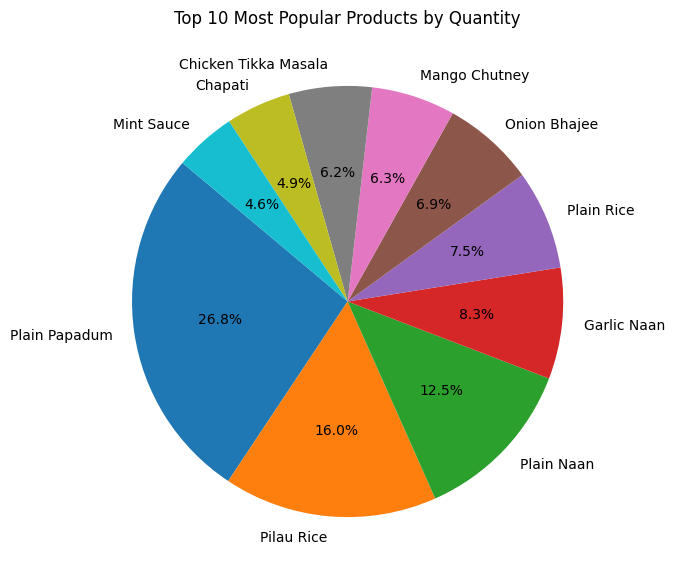

In [13]:
top_products_quantity = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 7))
top_products_quantity.plot.pie(y="quantity", autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Products by Quantity")
plt.ylabel("")

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

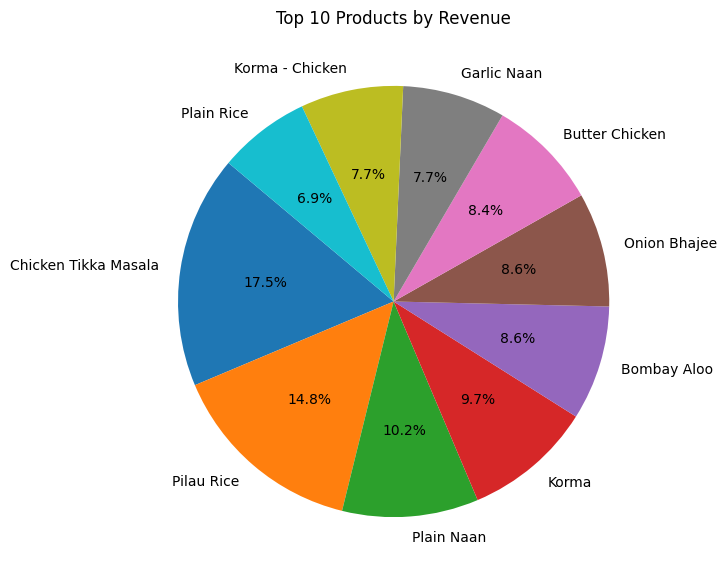

In [14]:
df["item_price"] = df["quantity"] * df["product_price"]
top_products_revenue = df.groupby("product_name")["item_price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 7))
top_products_revenue.plot.pie(y="item_price", autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Products by Revenue")
plt.ylabel("")

plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

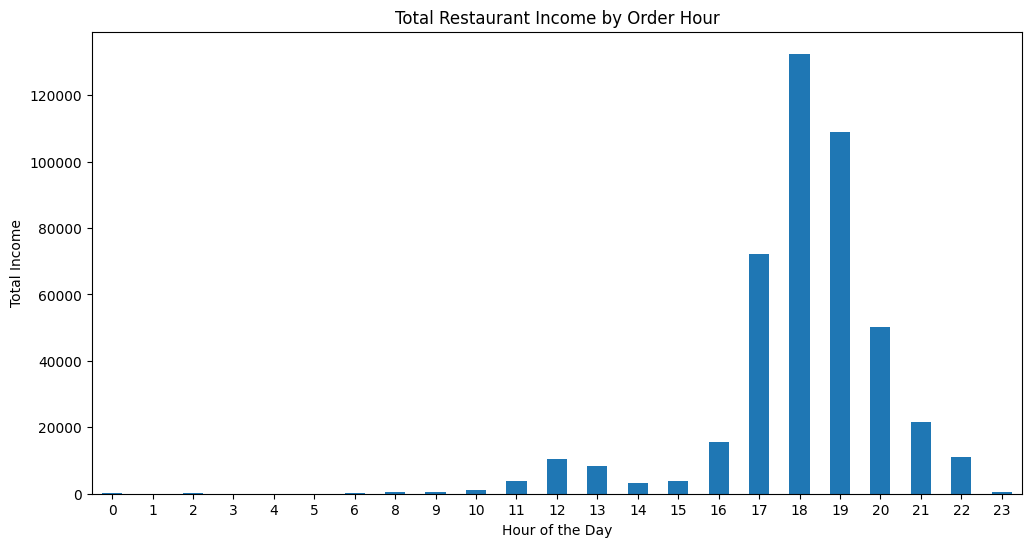

In [16]:
df["order_hour"] = pd.to_datetime(df["order_datetime"]).dt.hour

income_by_hour = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(12, 6))
income_by_hour.plot(kind="bar")
plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Income")
plt.xticks(rotation=0)

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

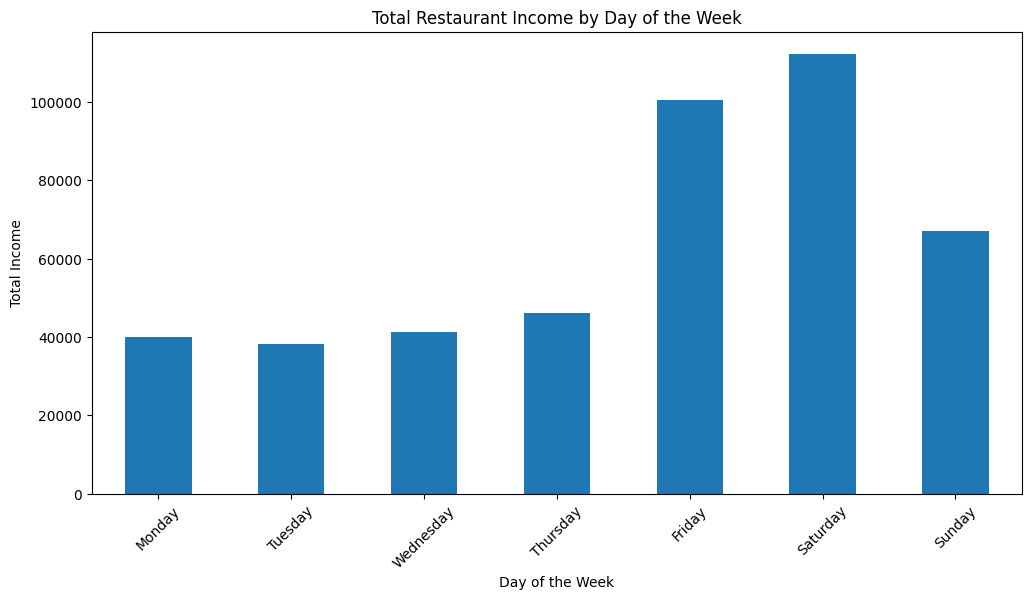

In [17]:
df["order_day_of_week"]  = pd.to_datetime(df["order_datetime"]).dt.day_name()

income_by_day = df.groupby("order_day_of_week")["item_price"].sum()

plt.figure(figsize=(12, 6))
income_by_day = income_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
income_by_day.plot(kind="bar")
plt.title("Total Restaurant Income by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.xticks(rotation=45)

plt.show()